## EDA of historical citibike ride data.
Data has been read into a sqlite3 database already.

## Some questions/figures to look at:
- Rides per year - is there a long-term trend 
- Rides per month
- Rides per day
- Rides per hour
- Rides per day of week
- Rides per station
- number of stations vs time
- length of rides
- differences between gender
- differences between user types

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
con = sqlite3.connect("data/citibike_database.db3")

First i'll examine the number of rides per month, for 2014. The plot below shows that there is a strong seasonal cycle, with more rides in the summer months. My hypothesis is that this is mainly driven by the temperature; I will get weather data later and test this.


## Total # of rides per yer. Complete years are 2014,2015,2016.
- Looks like ridership is increasing
- More rides, more users, more bikes, or both?

In [125]:
# rides per year - is there a trend in ridership?
df = pd.read_sql_query("SELECT year,count(*) as num_rides FROM rides WHERE year IN (2014,2015,2016) GROUP BY year",con)
df

,year,num_rides
0,2014,8081216
1,2015,9937969
2,2016,13845655


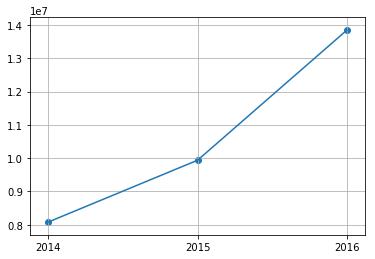

In [136]:
df.year = df.year.astype('int')
plt.plot(df.year,df.num_rides)
plt.scatter(df.year,df.num_rides)
plt.grid();
plt.gca().set_xticks([2014,2015,2016]);

## Plot the total number of rides per month, for each year
- Looks like a big increase in magnitude in 2016. Did # stations/bikes increas a lot, or did # users increase?
- 2013,2015,2016 seem to peak later in the fall compard to 2014?

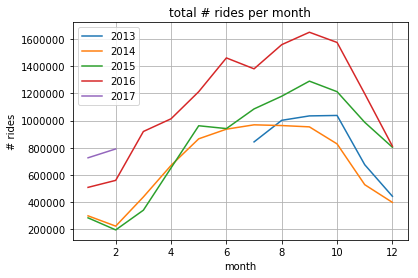

In [15]:
# count rides per month for one year
years = [2013,2014,2015,2016,2017]
for year in years:
    df = pd.read_sql_query("SELECT year,month,count(*) as num_rides FROM rides WHERE year=? GROUP BY month", con,params=[year])
    plt.plot(df.month, df.num_rides, label=str(year))
    #plt.scatter(df.month, df.num_rides)

plt.grid()
plt.xlabel('month')
plt.ylabel('# rides')
plt.legend();
plt.title('total # rides per month')

## Number of rides vs day of week. 0 is Monday, 6 is Sunday. 
- There are significanlty less rides on the weekend. 


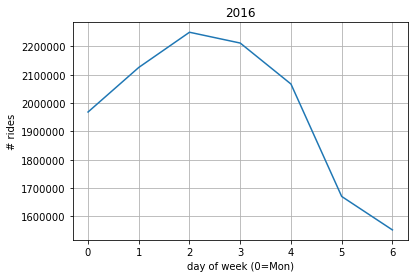

In [8]:
# For ONE year
year = 2016
query = "SELECT year,wkday,count(*) as num_rides FROM rides WHERE year=? GROUP BY wkday"
df_wkday = pd.read_sql_query(query, con, params=[year] )
plt.plot(df_wkday.wkday,df_wkday.num_rides)
plt.grid()
plt.xlabel('day of week (0=Mon)')
plt.ylabel('# rides')
plt.title(str(year))

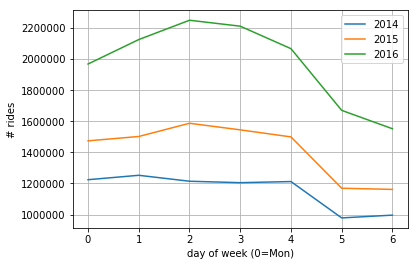

In [16]:
# For all comnplete years
# difference in magnitudes; maybe plot pdf instead?
years = [2014, 2015, 2016]
query = "SELECT year,wkday,count(*) as num_rides FROM rides WHERE year=? GROUP BY wkday"

for year in years:
    df_wkday = pd.read_sql_query(query, con, params=[year] )
    plt.plot(df_wkday.wkday,df_wkday.num_rides, label=str(year) )

plt.grid()
plt.xlabel('day of week (0=Mon)')
plt.ylabel('# rides')
#plt.title(
plt.legend();

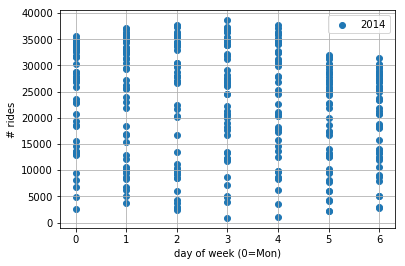

In [10]:
years = [2014]#, 2015]
query = "SELECT year,wkday,yday,count(*) as num_rides FROM rides WHERE year=? GROUP BY yday"

for year in years:
    df_wkday = pd.read_sql_query(query, con, params=[year] )
    plt.scatter(df_wkday.wkday,df_wkday.num_rides, label=str(year) )

plt.grid()
plt.xlabel('day of week (0=Mon)')
plt.ylabel('# rides')
#plt.title(
plt.legend();

## Number of rides per day. 
This shows that there is a strong seasonal pattern, but also some big residuals from that pattern. These could be days that were unseasonably cold/warm, or due to other factors. 

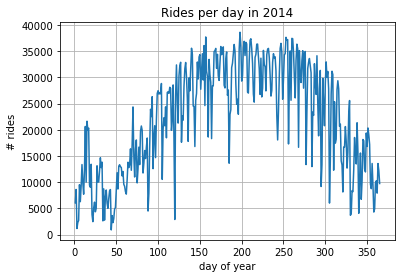

In [17]:
# plot rides/day for ONE year
year=2014
query = ('SELECT yday, count(*) as num_rides FROM rides WHERE year=? GROUP BY yday')
df = pd.read_sql_query(query, con, params=[year] )
plt.plot(df.yday,df.num_rides)
plt.grid()
plt.xlabel('day of year')
plt.ylabel('# rides')
plt.title('Rides per day in ' + str(year))

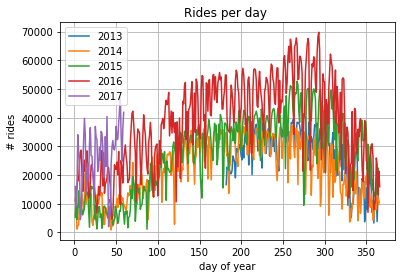

In [18]:
# for all years
years = [2013, 2014, 2015, 2016, 2017]
query = ('SELECT yday, count(*) as num_rides FROM rides WHERE year=? GROUP BY yday')

for year in years:
    df = pd.read_sql_query(query, con, params=[year] )
    plt.plot(df.yday, df.num_rides, label=str(year) )

plt.grid()
plt.xlabel('day of year')
plt.ylabel('# rides')
plt.title('Rides per day ')
plt.legend();

## Number of rides by hour. 
- There are two peaks - near 7-8am, and 17-18 pm, which probably correspond to people commuting during rush hour.
- This pattern is very similar each year

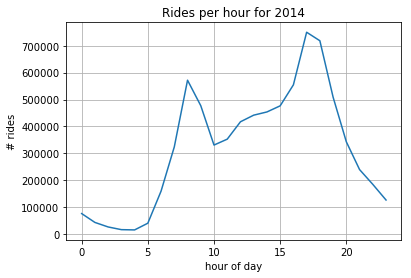

In [6]:
# For ONE year
year = 2014
df_hr = pd.read_sql_query("select hour,count(*) as num_rides from rides where year=? group by hour",con,params=[year])
plt.plot(df_hr.hour,df_hr.num_rides)
plt.grid()
plt.xlabel('hour of day')
plt.ylabel('# rides')
plt.title('Rides per hour for ' + str(year) )

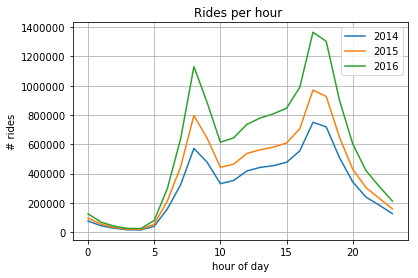

In [7]:
# For all years
years = [2014, 2015, 2016]
query = ('SELECT hour,count(*) as num_rides FROM rides WHERE year=? GROUP BY hour')

for year in years:
    df_hr = pd.read_sql_query(query, con, params=[year])
    plt.plot(df_hr.hour, df_hr.num_rides, label=str(year))

plt.grid()
plt.xlabel('hour of day')
plt.ylabel('# rides')
plt.title('Rides per hour ')
plt.legend();

## Plot vs hour, but separate weekdays/weekends
- Weekdays: rush hour
- weekends: people sleep in, ride throughout the day

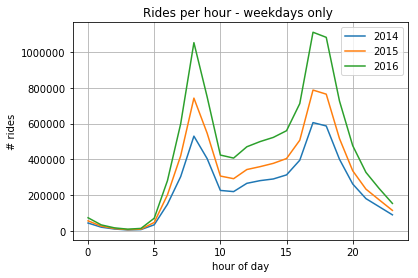

In [20]:
years = [2014, 2015, 2016]
query = ('SELECT hour,count(*) as num_rides FROM rides WHERE year=? AND wkday<5 GROUP BY hour')

for year in years:
    df_hr = pd.read_sql_query(query, con, params=[year])
    plt.plot(df_hr.hour, df_hr.num_rides, label=str(year))

plt.grid()
plt.xlabel('hour of day')
plt.ylabel('# rides')
plt.title('Rides per hour - weekdays only ')
plt.legend();

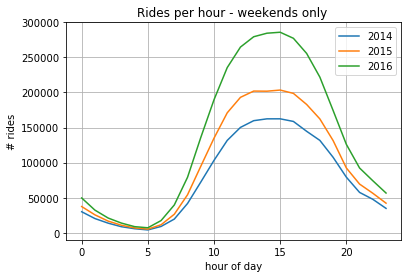

In [21]:
years = [2014, 2015, 2016]
query = ('SELECT hour,count(*) as num_rides FROM rides WHERE year=? AND wkday>4 GROUP BY hour')

for year in years:
    df_hr = pd.read_sql_query(query, con, params=[year])
    plt.plot(df_hr.hour, df_hr.num_rides, label=str(year))

plt.grid()
plt.xlabel('hour of day')
plt.ylabel('# rides')
plt.title('Rides per hour - weekends only ')
plt.legend();

## Trip duration vs day of week
- Trips tend to be longer on weekends

In [ ]:
query = 'SELECT tripduration FROM rides '
df = pd.read_sql_query(query,con)
plt.hist(df.tripduration)

In [30]:
query = 'SELECT avg(tripduration) as dur,wkday  FROM rides WHERE year=2015 GROUP BY wkday'
df = pd.read_sql_query(query,con)
df.head()

,dur,wkday
0,920.455569,0
1,888.399213,1
2,884.227999,2
3,914.136384,3
4,944.398910,4


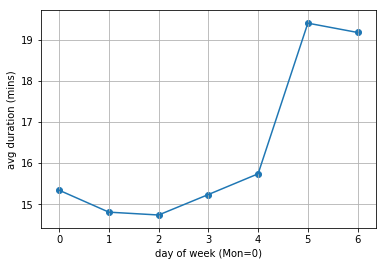

In [38]:
plt.plot(df.wkday, df.dur/60)
plt.scatter(df.wkday, df.dur/60)
plt.grid()
plt.xlabel('day of week (Mon=0)')
plt.ylabel('avg duration (mins)')

## Rides per station.
- Stations change/move/open/close over time, so this might be tricky.
- Definitely few outliers with way more rides than most. Are these near transportation hubs? Do they have more bikes available? Have they been around longer?

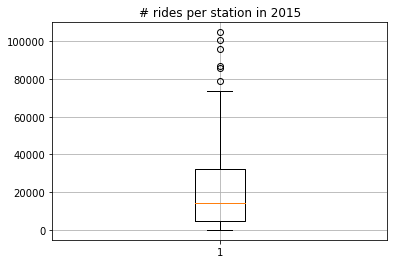

In [11]:
# Rides per station (* stations change over time?)
year=2015
query = "SELECT start_station_id, count(*) as num_rides FROM rides WHERE year=? GROUP BY start_station_id ORDER BY num_rides DESC"
df = pd.read_sql_query(query,con, params=[year])
plt.boxplot(df.num_rides);
plt.grid()
plt.title('# rides per station in ' + str(year) )

## Separate weekday/weekends
- guess is that weekday rides will be more around transit stations etc.

In [153]:
# Rides per station (* stations change over time?)
year=2015
query = "SELECT start_station_id, count(*) as num_rides FROM rides WHERE year=? and wkday<5 GROUP BY start_station_id ORDER BY num_rides DESC"
df_wkday = pd.read_sql_query(query,con, params=[year])
#plt.boxplot(df.num_rides);
#plt.grid()
#plt.title('# rides per station in ' + str(year) )

In [154]:
df_wkday.head(10)

,start_station_id,num_rides
0,519,94035
1,521,89372
2,293,73912
3,435,65967
4,497,63910
5,477,56015
6,426,54605
7,490,54202
8,285,54004
9,529,53006


In [155]:
year=2015
query = "SELECT start_station_id, count(*) as num_rides FROM rides WHERE year=? and wkday>4 GROUP BY start_station_id ORDER BY num_rides DESC"
df_wkend = pd.read_sql_query(query,con, params=[year])
df_wkend.head(10)

,start_station_id,num_rides
0,426,24456
1,497,22198
2,2006,22114
3,293,21978
4,435,21182
5,499,20215
6,285,19678
7,151,19178
8,368,18964
9,387,17988


### Plot maps showing most used stations on weekdays, weekends?
- wkday stations are near Penn St, Grand Central?
- wkend stations near Central Park

In [156]:
station_info = pd.read_sql_query('SELECT * FROM stations',con)
station_info.head()
df_wkday_comb = pd.merge(df_wkday,station_info,left_on='start_station_id',right_on='id')
df_wkend_comb = pd.merge(df_wkend,station_info,left_on='start_station_id',right_on='id')

In [169]:
import folium
map_wkday = folium.Map(location=[40.73, -73.97],zoom_start=12)
map_wkday
Nsta = 20
lat_list = df_wkday_comb.lat[0:Nsta]
lon_list = df_wkday_comb.lon[0::Nsta]
names = df_wkday_comb.name[0:Nsta]
# add station locations:
for lat, lon, name in zip(lat_list, lon_list, names):
    #print(lat,lon,name)
#   folium.Marker([lat, lon], popup=name).add_to(map_osm)
    folium.CircleMarker([lat, lon], popup=name, radius=10, fill_opacity=0.2,fill_color='grey', color='grey' ).add_to(map_wkday)
map_wkday

In [170]:
map_wkend = folium.Map(location=[40.73, -73.97],zoom_start=12)
map_wkend
lat_list = df_wkend_comb.lat[0:Nsta]
lon_list = df_wkend_comb.lon[0:Nsta]
names = df_wkend_comb.name[0:Nsta]
# add station locations:
for lat, lon, name in zip(lat_list, lon_list, names):
    #print(lat,lon,name)
#   folium.Marker([lat, lon], popup=name).add_to(map_osm)
    folium.CircleMarker([lat, lon], popup=name, radius=10, fill_opacity=0.2,fill_color='blue', color='grey' ).add_to(map_wkend)
map_wkend

## Number of unique stations per year or month? 
- See when number of stations changed; this could effect ridership (more bikes?)
- Need to account for changing # stations, or just build model using a period where it didn't change?

In [19]:
df_stat = pd.DataFrame(columns=['year','month','nrows'])
#df_stat = pd.DataFrame(['year','month','nrows'])

#month = 1
#year = 2015
query = 'SELECT distinct year, month, start_station_id FROM rides WHERE year=? AND month=? '

for year in [2014,2015,2016]:
    for month in range(1,13):
        df = pd.read_sql_query(query, con, params=[year,month])
        newdf = pd.DataFrame({'year':[year],'month':[int(month)],'nrows':[int(len(df))]})
        df_stat = df_stat.append(newdf,ignore_index=True)
df_stat

,month,nrows,year
0,1.0,329.0,2014.0
1,2.0,329.0,2014.0
2,3.0,331.0,2014.0
3,4.0,329.0,2014.0
4,5.0,328.0,2014.0
5,6.0,328.0,2014.0
6,7.0,328.0,2014.0
7,8.0,326.0,2014.0
8,9.0,328.0,2014.0
9,10.0,329.0,2014.0


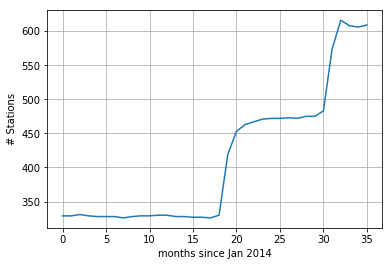

In [22]:
plt.plot(df_stat.nrows)
plt.grid();
plt.ylabel('# Stations');
plt.xlabel('months since Jan 2014');

## Number of unique bikes?

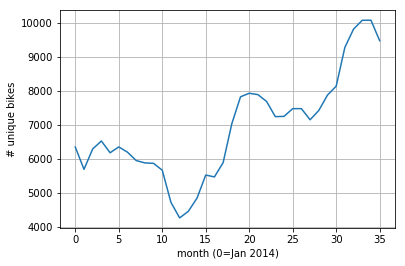

In [23]:
query = 'SELECT COUNT(DISTINCT bikeid) as numbikes FROM rides WHERE year=? AND month=?'
nbikes=[]
for year in [2014,2015,2016]:
    #print(str(year))
    for month in range(1,13):
        #print(str(month))
        df = pd.read_sql_query(query, con, params=[year,month])
        #df.head()
        nbikes.append(df.numbikes)

#nbikes

# Plot # of unique bikes over time
plt.plot(nbikes)
plt.grid();
plt.xlabel('month (0=Jan 2014)')
plt.ylabel('# unique bikes')
#plt.title(str(year))

## Differences between usertype?
- Usertypes are either customer or describer

In [26]:
df = pd.read_sql_query('SELECT usertype,count(*) as N FROM rides GROUP BY usertype',con)
df

,usertype,N
0,None,51780
1,Customer,4372550
2,Subscriber,34723683


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
usertype    2 non-null object
N           3 non-null int64
dtypes: int64(1), object(1)
memory usage: 128.0+ bytes


In [28]:
df['usertype'][df['usertype']=='None']='missing'
df['usertype']=df.usertype.astype('category')
df.info()
#plt.bar(df.usertype,df.N)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
usertype    2 non-null object
N           3 non-null int64
dtypes: int64(1), object(1)
memory usage: 128.0+ bytes


/Users/Andy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [89]:
df.usertype[df.usertype=='None']=0;
df.usertype[df.usertype=='Customer']=1;
df.usertype[df.usertype=='Subscriber']=2;
df
#plt.bar(df.usertype,df.N)

/Users/Andy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Andy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Andy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,usertype,N
0,None,46644
1,1,4322891
2,2,33611696


## Does age of rider have an effect?

### Look at unique age values to check for outliers first
- Some birth years is in 1800's! Error? Probably recorded 18 instead of 19 in birth year?

In [29]:
query = 'SELECT distinct birth_year FROM rides ORDER BY birth_year'
df = pd.read_sql_query(query,con)
df.head()


,birth_year
0,None
1,1858.0
2,1885.0
3,1886.0
4,1887.0


In [40]:
import numpy as np
df.birth_year[0]=np.nan
df.birth_year[-1]=np.nan
df.birth_year[185]=np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 1 columns):
birth_year    185 non-null object
dtypes: object(1)
memory usage: 1.5+ KB


In [48]:
#df.birth_year

In [42]:
df.birth_year=df.birth_year.dropna().astype('float64')
df['age'] = 2017-df.birth_year
df.info()
#df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
birth_year    184 non-null float64
age           184 non-null float64
dtypes: float64(2)
memory usage: 3.0 KB


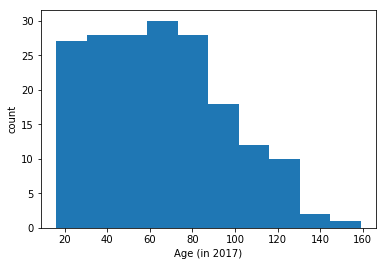

In [47]:
plt.hist(df.dropna().age)
plt.xlabel('Age (in 2017)');
plt.ylabel('count');


In [44]:
old = df.dropna().age[df.dropna().age>100]
len(old)

25

### Now look at distribution of rides by age

In [108]:
query = 'SELECT birth_year,count(*) as num_rides FROM rides WHERE birth_year != "None" AND birth_year != "\\N" GROUP BY birth_year'
df = pd.read_sql_query(query,con)
df.tail()

,birth_year,num_rides
179,1998,1441
180,1998.0,53422
181,1999.0,28831
182,2000.0,8919
183,2001.0,53


In [111]:
#df['birth_year'][df['birth_year']=='\\N']=np.nan
#df.dropna(inplace=True)
df['birth_year']=df['birth_year'].astype('float64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
birth_year    184 non-null float64
num_rides     184 non-null int64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB


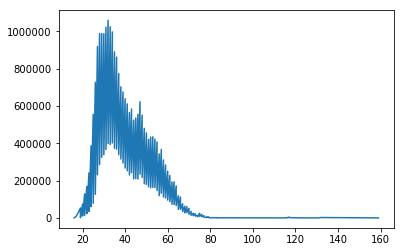

In [112]:
df['age']=2017-df.birth_year
plt.plot(df.age, df.num_rides)

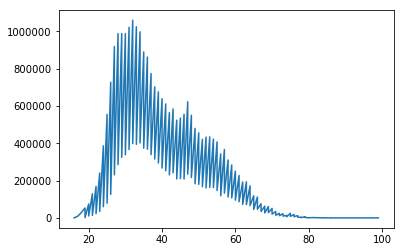

In [113]:
df2 = df.loc[df.age<100]
plt.plot(df2.age, df2.num_rides)

In [114]:
query = 'SELECT birth_year FROM rides WHERE birth_year != "None" AND birth_year != "\\N" '
df = pd.read_sql_query(query,con)
df.head()

,birth_year
0,1980
1,1986
2,1988
3,1985
4,1980


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34677949 entries, 0 to 34677948
Data columns (total 2 columns):
birth_year    float64
age           float64
dtypes: float64(2)
memory usage: 529.1 MB


(array([  1.23546300e+06,   9.39966800e+06,   9.32290700e+06,
          7.01837600e+06,   4.51931500e+06,   2.40867600e+06,
          6.56343000e+05,   9.58220000e+04,   5.10600000e+03,
          2.27800000e+03]),
 array([ 16. ,  24.3,  32.6,  40.9,  49.2,  57.5,  65.8,  74.1,  82.4,
         90.7,  99. ]),
 <a list of 10 Patch objects>)

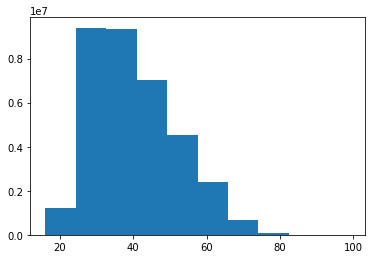

In [121]:
df.info()
#df.loc[:,df['birth_year']=='\\N']
#df.head()
df.birth_year=df.birth_year.astype('float64')
df['age'] = 2017-df.birth_year
df = df.loc[df.age<100]
plt.hist(df.age)

{'boxes': [<matplotlib.lines.Line2D at 0x11c33ffd0>],
 'caps': [<matplotlib.lines.Line2D at 0x11c343a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c348550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11c346c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11c340710>,
  <matplotlib.lines.Line2D at 0x11c3421d0>]}

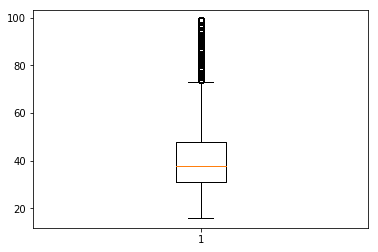

In [122]:
plt.boxplot(df.age)

## Differences between gender?
- 0=unknown, 1=male, 2=female
- does this change over time?


In [69]:
df=pd.read_sql_query('SELECT gender,count(*) as N FROM rides GROUP BY gender',con)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
gender    3 non-null int64
N         3 non-null int64
dtypes: int64(2)
memory usage: 128.0 bytes


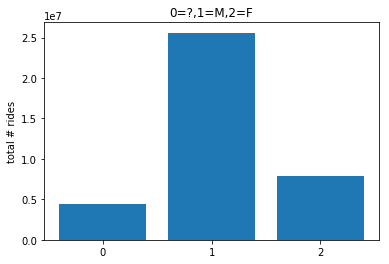

In [81]:
#df.info()
df.gender=df.gender.astype('int64')
df.info()
plt.bar(df.gender,df.N)
plt.xticks([0,1,2])
plt.title('0=?,1=M,2=F')
plt.ylabel('total # rides')

In [77]:
df

,gender,N
0,0,4466491
1,1,25597954
2,2,7916786


## Plot calendar heatmap of rides

In [ ]:
import calmap
# data has to be a Series indexed by datetime
calmap.calendarplot(data, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(8, 4)))

## Fit multiple linear regression using year, month, day of week as features?

In [14]:
query = 'SELECT year,month,wkday, count(*) as num_rides FROM rides WHERE year=2015 GROUP BY yday'
df = pd.read_sql_query(query,con)
df.head()

,year,month,wkday,num_rides
0,2015,1,3,5317
1,2015,1,4,11304
2,2015,1,5,4478
3,2015,1,6,7849
4,2015,1,0,14506


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# need to make dummy variables for month, yday etc..
#pd.get_dummies(df.month)
dum = LabelEncoder().fit_transform(df['month'])
dum
#X = df.iloc[:,0:3]
#X.head()

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7

In [16]:
Y = df['num_rides']

In [17]:
reg = LinearRegression()
reg.fit(X,Y)
reg.coef_

NameError: name 'X' is not defined

In [ ]:

con.close()

In [11]:
pd.read_sql_query('select * from rides where year=2014 and month=3',con)

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birth_year,gender,day,month,year,yday,wkday,hour


In [ ]:
#df = pd.read_sql_query("select start_station_id, start_station_name, count(*) as num_rides from rides where year=2014 group by start_station_id order by num_rides desc",con)

To-do:
- fit seasonal cycle and remove to examine anomalies?
